In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# https://www.kaggle.com/datasets/sohier/calcofi - dataset from kaggle

In [3]:
cast_df = pd.read_csv('cast.csv')
bottle_df = pd.read_csv('bottle.csv')

C:\Users\Dmytro\AppData\Local\Temp\ipykernel_23472\1264602169.py:1: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  cast_df = pd.read_csv('cast.csv')
C:\Users\Dmytro\AppData\Local\Temp\ipykernel_23472\1264602169.py:2: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  bottle_df = pd.read_csv('bottle.csv')


In [4]:
print(cast_df.head())
print(bottle_df.head())

   Cst_Cnt          Cruise_ID  Cruise        Cruz_Sta  DbSta_ID  \
0        1  1949-03-01-C-31CR  194903  19490305400560   5400560   
1        2  1949-03-01-C-31CR  194903  19490305200750   5200750   
2        3  1949-03-01-C-31CR  194903  19490305100850   5100850   
3        4  1949-03-01-C-31CR  194903  19490305000950   5000950   
4        5  1949-03-01-C-31CR  194903  19490305001040   5001040   

                          Cast_ID       Sta_ID  Quarter Sta_Code  Distance  \
0  19-4903CR-HY-060-0930-05400560  054.0 056.0        1      NST       NaN   
1  19-4903CR-HY-060-2112-05200750  052.0 075.0        1      NST       NaN   
2  19-4903CR-HY-061-0354-05100850  051.0 085.0        1      NST       NaN   
3  19-4903CR-HY-061-1042-05000950  050.0 095.0        1      NST       NaN   
4  19-4903CR-HY-061-1706-05001040  050.0 104.0        1      NST       NaN   

   ... Wave_Prd  Wind_Dir  Wind_Spd  Barometer  Dry_T Wet_T  Wea  Cloud_Typ  \
0  ...      NaN      23.0      18.0        NaN   

In [5]:
merged_df = pd.merge(bottle_df, cast_df[['Cst_Cnt', 'Date', 'Lat_Dec', 'Lon_Dec']], on='Cst_Cnt', how='left')

In [6]:
chl_data = merged_df[['Date', 'Lat_Dec', 'Lon_Dec', 'Depthm', 'ChlorA']].dropna()

In [7]:
print(merged_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment', 'Date',
       'Lat_Dec', 'Lon_Dec'],
      dtype='object')


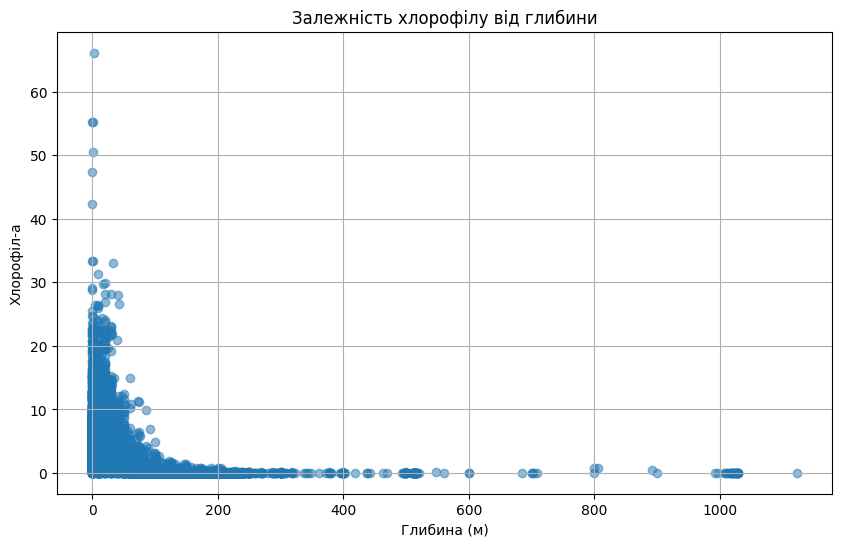

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(chl_data['Depthm'], chl_data['ChlorA'], alpha=0.5)
plt.title('Залежність хлорофілу від глибини')
plt.xlabel('Глибина (м)')
plt.ylabel('Хлорофіл-a')
plt.grid(True)
plt.show()


In [9]:
#regression

In [10]:
X = chl_data[['Depthm']]
y = chl_data['ChlorA']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
y_pred = model.predict(X_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1.43
Mean Absolute Error: 0.45


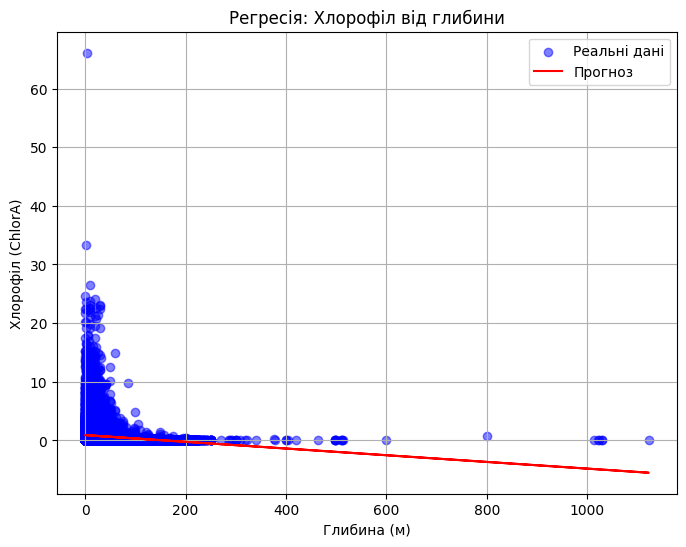

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Реальні дані')
plt.plot(X_test, y_pred, color='red', label='Прогноз')
plt.title('Регресія: Хлорофіл від глибини')
plt.xlabel('Глибина (м)')
plt.ylabel('Хлорофіл (ChlorA)')
plt.legend()
plt.grid(True)
plt.show()